In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [136]:
def log_gamma_transform(x):
    return (np.log(100-x+1))**0.75

In [137]:
mean_value = 1.6768478843329286
std_deviation = 0.19168201631784487**0.5
threshold_transform_point = log_gamma_transform(89)

In [138]:
threshold = norm.pdf(threshold_transform_point, mean_value, std_deviation)
print(threshold)

0.7179264713890777


In [139]:
# 读取CSV文件
file_path = "DistrictLevelData_V3.csv"  # 替换为你的DistrictLevelData_V3.csv文件路径
df = pd.read_csv(file_path)

In [140]:
# 提取学生出勤率列
attendance_column_name = 'AttendancePercent'  # 替换为你的CSV文件中出勤率列的列名
attendance_data = df[attendance_column_name]

In [141]:
# 清理数据，去除非数字数据
attendance_data = pd.to_numeric(attendance_data, errors='coerce')
attendance_data = attendance_data.dropna()

In [142]:
data = (np.log(100-attendance_data+1))**0.75
to_detect_data = data[data<mean_value]

In [143]:
# 使用正态分布的概率密度函数计算每个数据点的概率密度
pdf_values = norm.pdf(data, mean_value, std_deviation)

In [144]:
# 将概率密度低于阈值的数据点标记为异常值
anomalies = data[pdf_values < threshold]

因为涉及负偏度对数变换，异常数据转换后应该大于均值

In [145]:
anomal_attendance_data = attendance_data[(pdf_values < threshold) & (data > mean_value)]

In [146]:
nomal_attendance_data = attendance_data[(pdf_values >= threshold) & (data <= mean_value)]

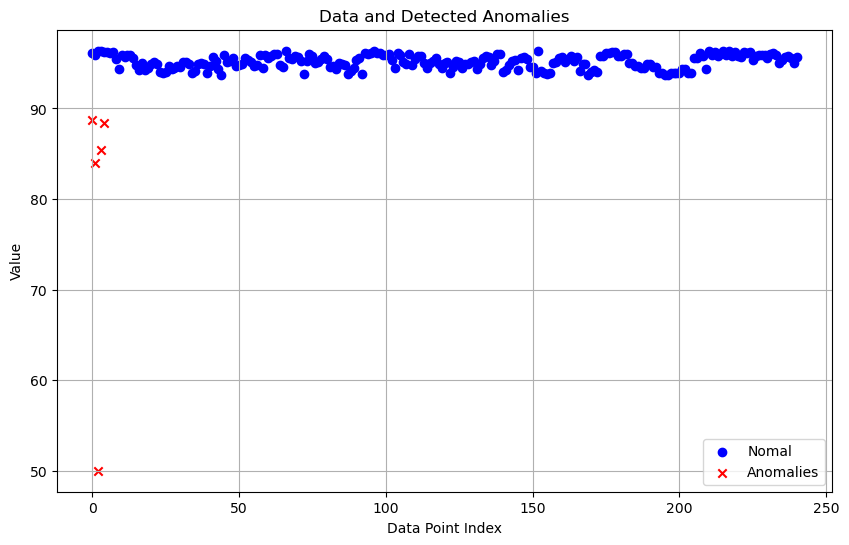

In [147]:
# 绘制数据和异常值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len( nomal_attendance_data)), nomal_attendance_data, label='Nomal', color='blue')
plt.scatter(range(len(anomal_attendance_data)), anomal_attendance_data, label='Anomalies', color='red', marker='x')
plt.title('Data and Detected Anomalies')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()